<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [130]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-07-17 16:20:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.1’

survey-data.csv.1   100%[===================>] 152.13M  52.1MB/s    in 2.9s    

2025-07-17 16:20:29 (52.1 MB/s) - ‘survey-data.csv.1’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [131]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [132]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [134]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [135]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [136]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [137]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [138]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [139]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [140]:
import numpy as np

Text(0, 0.5, 'Frequency')

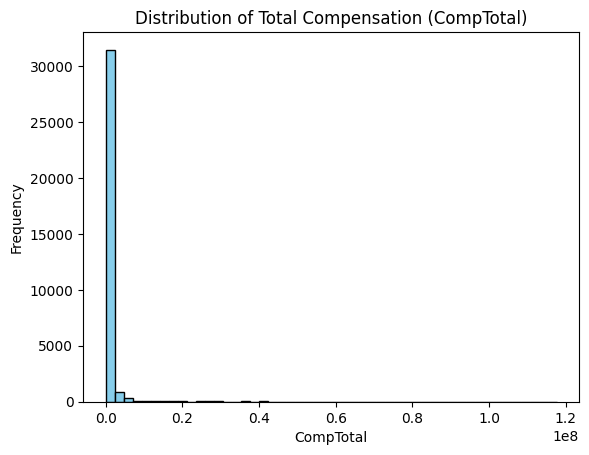

In [141]:
## Write your code here
QUERY = """
SELECT CompTotal
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
comp_total = df['CompTotal'].dropna()

upper_limit = np.percentile(comp_total, 99)
comp_total_capped = comp_total[comp_total <= upper_limit]

plt.hist(comp_total_capped, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')

**Box Plots**

Plot a box plot of Age.


([<matplotlib.axis.XTick at 0x7fcc8f2b52b0>], [Text(1, 0, 'Age')])

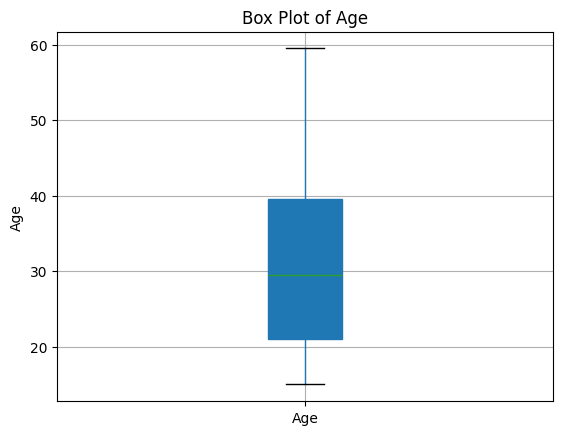

In [142]:
## Write your code here
QUERY = " SELECT Age FROM Main"

def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29.5
    elif '35-44' in age_str:
        return 39.5
    elif '45-54' in age_str:
        return 49.5
    elif '55-64' in age_str:
        return 59.5
    elif '65 or older' in age_str or '65+' in age_str:
        return 67.5
    else:
        return None
        
df= pd.read_sql_query(QUERY, conn)
df['AgeNumeric'] = df['Age'].apply(map_age_range)

df.boxplot(column='AgeNumeric',vert=True, patch_artist=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xticks([1], ['Age'])

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


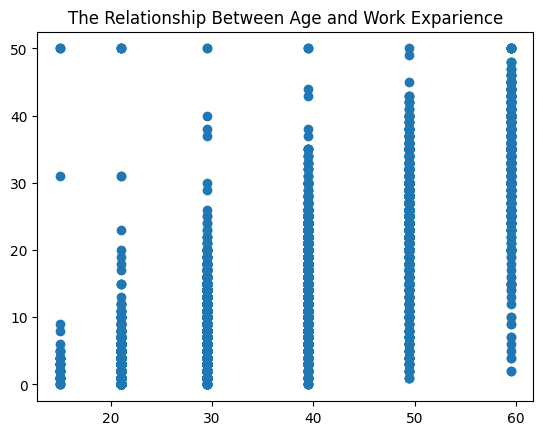

In [59]:
## Write your code here
QUERY = " SELECT Age, WorkExp FROM Main"
def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29.5
    elif '35-44' in age_str:
        return 39.5
    elif '45-54' in age_str:
        return 49.5
    elif '55-64' in age_str:
        return 59.5
    elif '65 or older' in age_str or '65+' in age_str:
        return 67.5
    else:
        return None
        
df= pd.read_sql_query(QUERY, conn)
df['AgeNumeric'] = df['Age'].apply(map_age_range)

plt.scatter(x=df['AgeNumeric'], y= df['WorkExp'])
plt.title("The Relationship Between Age and Work Exparience")
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


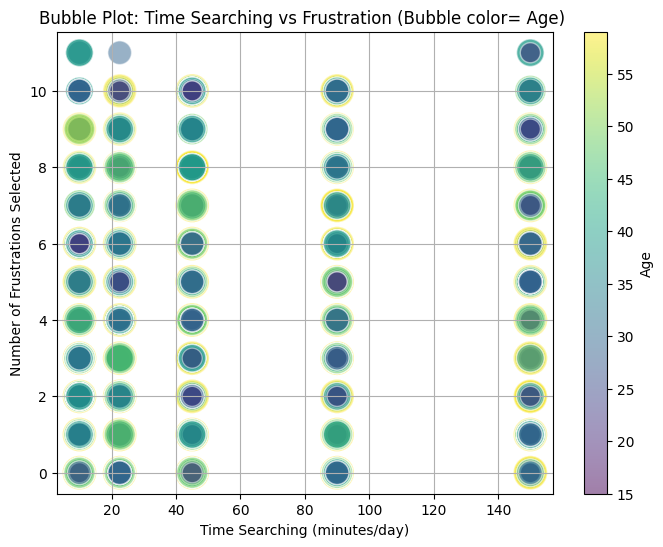

In [89]:
## Write your code here
QUERY = "SELECT Age, TimeSearching, Frustration FROM Main"

def map_age_range(age_str):
    if pd.isnull(age_str):
        return None
    elif 'Under 18' in age_str:
        return 15
    elif '18-24' in age_str:
        return 21
    elif '25-34' in age_str:
        return 29
    elif '35-44' in age_str:
        return 39
    elif '45-54' in age_str:
        return 49
    elif '55-64' in age_str:
        return 59
    elif '65 or older' in age_str or '65+' in age_str:
        return 67
    else:
        return None
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

def count_frustrations(val):
    if pd.isnull(val):
        return 0
    if val.strip() == "None of these":
        return 0
    return len(val.split(';'))
df = pd.read_sql_query(QUERY, conn)

df['FrustrationNum'] = df['Frustration'].apply(count_frustrations)
df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['AgeNumeric'] = df['Age'].apply(map_age_range)

df_clean = df[['TimeSearchingNum', 'FrustrationNum', 'AgeNumeric']].dropna()

plt.figure(figsize=(8,6))
plt.scatter(
    df_clean['TimeSearchingNum'],
    df_clean['FrustrationNum'],
    s=df_clean['AgeNumeric']*10,
    alpha=0.5,
    c=df_clean['AgeNumeric'],
    cmap='viridis',
    edgecolors='w'
)
plt.xlabel('Time Searching (minutes/day)')
plt.ylabel('Number of Frustrations Selected')
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble color= Age) ')
plt.colorbar(label='Age')
plt.grid(True)
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


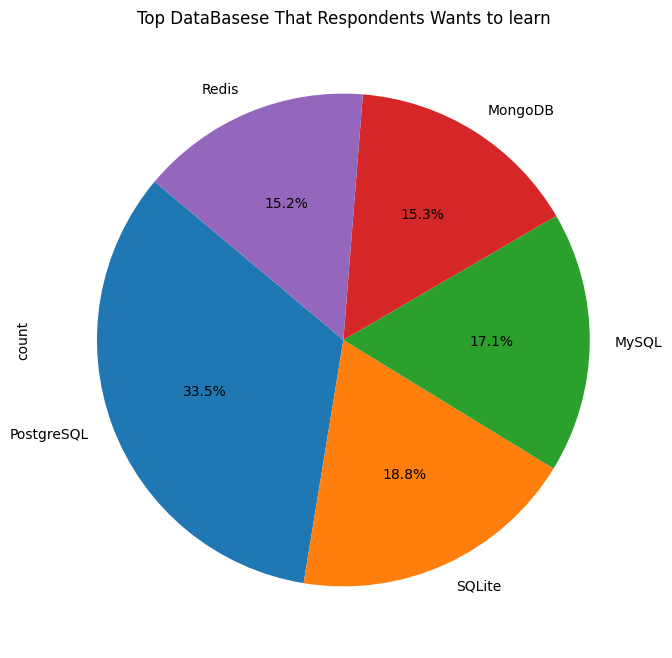

In [101]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df_want = df['DatabaseWantToWorkWith'].dropna().str.split(';')
df_want = df_want.explode().str.strip()
langwant_count = df_want.value_counts()

langwant_count.head(5).plot(kind='pie', figsize=(8, 8),autopct='%1.1f%%', startangle=140)
plt.title('Top DataBasese That Respondents Wants to learn')
plt.show()

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [111]:
QUERY = "SELECT Age, TimeSearching, Frustration FROM Main"
df = pd.read_sql_query(QUERY, conn)
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

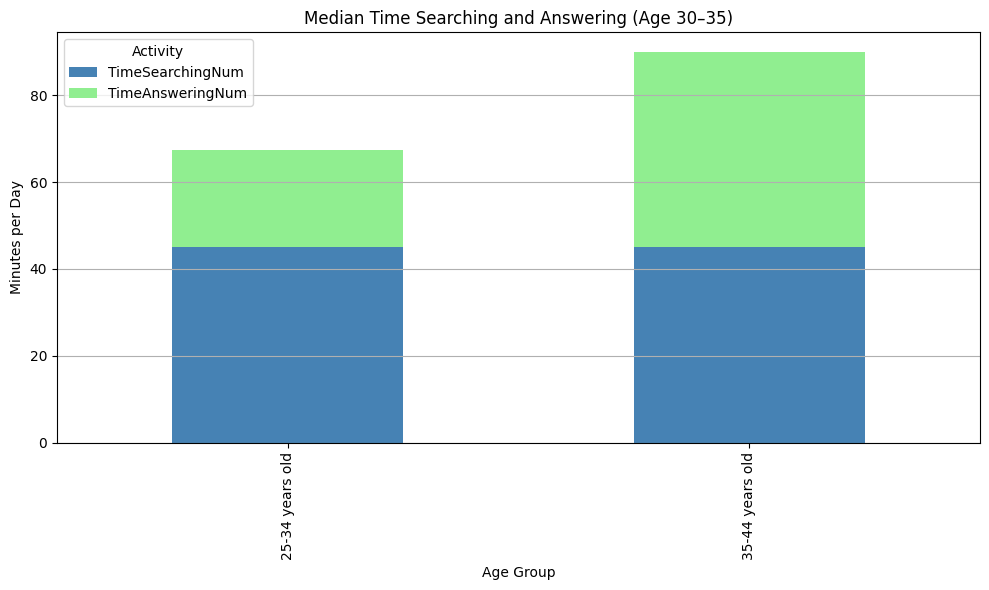

In [120]:
## Write your code here
QUERY = """
SELECT TimeSearching, TimeAnswering, Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

def map_age_to_numeric(age_str):
    if pd.isnull(age_str):
        return None
    elif age_str == 'Under 18 years old':
        return 15
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 30.5
    elif age_str == '35-44 years old':
        return 35
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 67.5
    else:
        return None  
time_map = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}

df['TimeSearchingNum'] = df['TimeSearching'].map(time_map)
df['TimeAnsweringNum'] = df['TimeAnswering'].map(time_map)
df['AgeNumeric'] = df['Age'].apply(map_age_to_numeric)

df_filtered = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]


df_grouped = df_filtered.groupby('Age')[['TimeSearchingNum', 'TimeAnsweringNum']].median()


df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['steelblue', 'lightgreen'])

plt.title('Median Time Searching and Answering (Age 30–35)')
plt.ylabel('Minutes per Day')
plt.xlabel('Age Group')
plt.legend(title='Activity')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


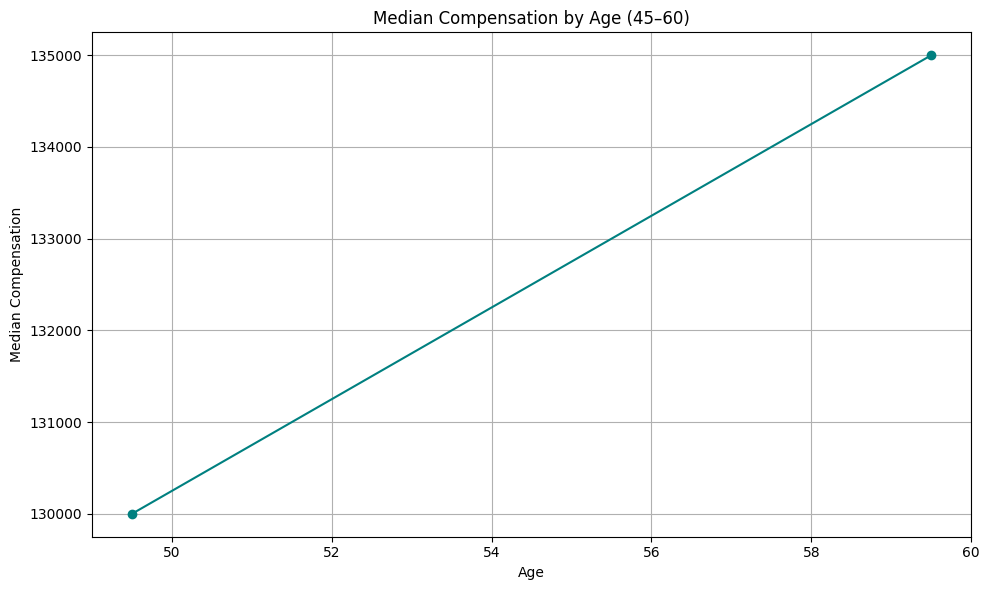

In [123]:
## Write your code here
QUERY = """
SELECT CompTotal,Age
FROM main
"""
df = pd.read_sql_query(QUERY, conn)

def map_age_to_numeric(age_str):
    if pd.isnull(age_str):
        return None
    elif age_str == 'Under 18 years old':
        return 15
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 30.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 67.5
    else:
        return None  
        
df['AgeNumeric'] = df['Age'].apply(map_age_to_numeric)

df_filtered = df[(df['AgeNumeric'] >= 45) & (df['AgeNumeric'] <= 60)]

df_filtered = df_filtered.dropna(subset=['CompTotal'])

median_comp = df_filtered.groupby('AgeNumeric')['CompTotal'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o', color='teal')

plt.title('Median Compensation by Age (45–60)')
plt.xlabel('Age')
plt.ylabel('Median Compensation')
plt.grid(True)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


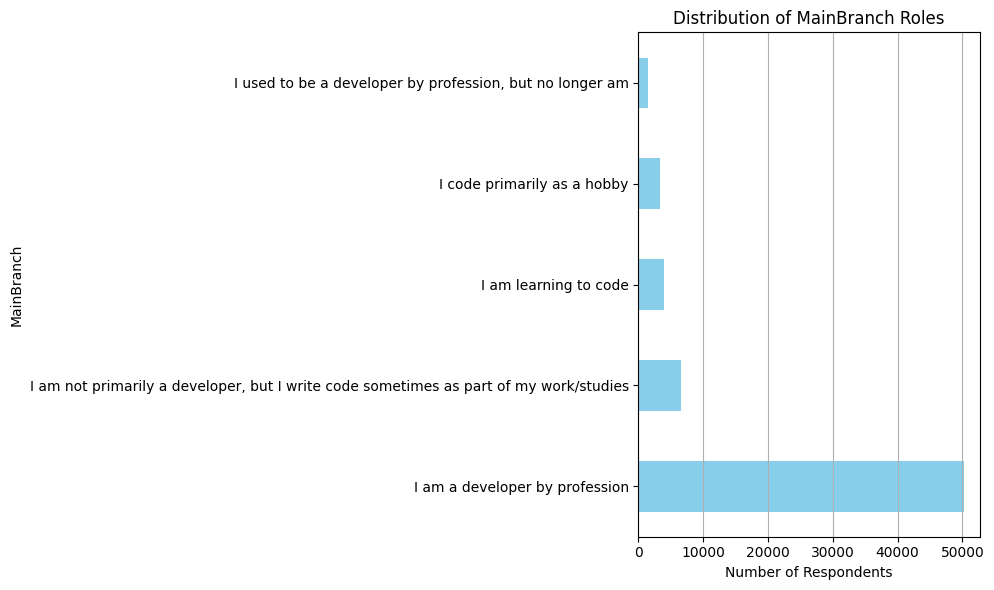

In [129]:
## Write your code here
QUERY = """SELECT MainBranch
from main
"""
df = pd.read_sql_query(QUERY, conn)

branch_counts = df['MainBranch'].value_counts()

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch Roles')
plt.xlabel('Number of Respondents')
plt.ylabel('MainBranch')
plt.tight_layout()
plt.grid(axis='x')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
